# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


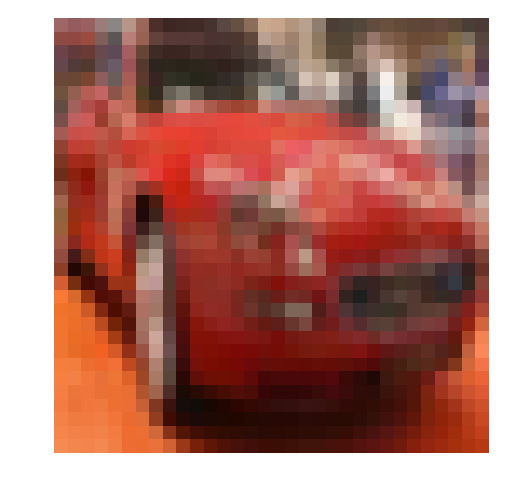

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 6:
Image - Min Value: 7 Max Value: 249
Image - Shape: (32, 32, 3)
Label - Label Id: 2 Name: bird


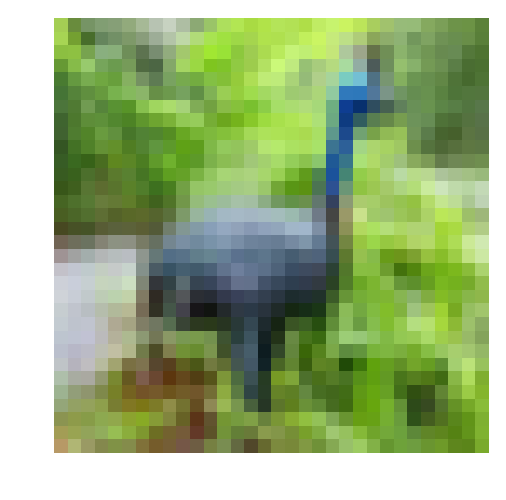

In [37]:
# Explore the dataset
batch_id = 1
sample_id = 6
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 10:
Image - Min Value: 4 Max Value: 231
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


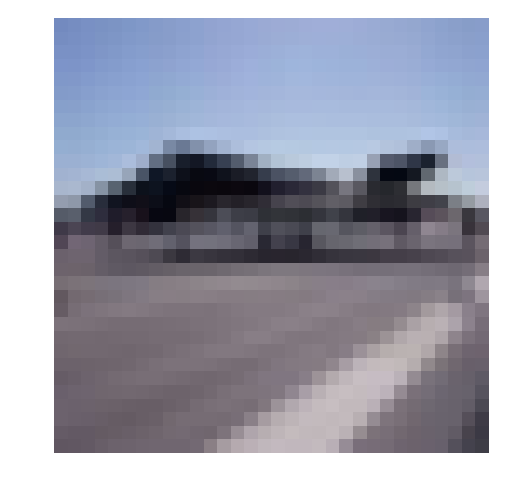

In [38]:
# Explore the dataset
batch_id = 2
sample_id = 10
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 20:
Image - Min Value: 26 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 5 Name: dog


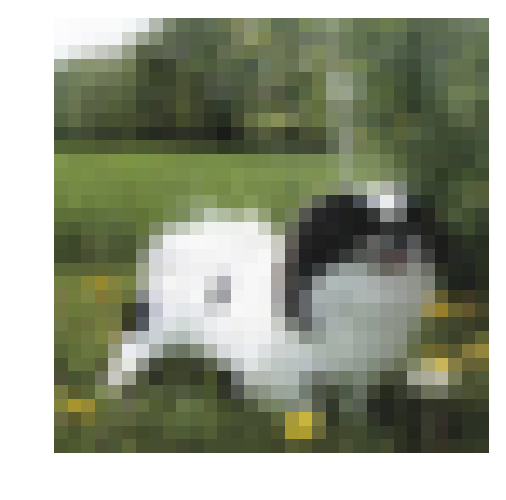

In [39]:
# Explore the dataset
batch_id = 3
sample_id = 20
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

* What are all possible labels? numbers between 0 and 9, 
* what is the range of values for the image data? 0-255, 
* Are the labels in order or random? Random.
* Classes seem balanced


## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [40]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    normalized_data = (x-np.min(x))/np.ptp(x)#(x - min(x)) / (max(x)-min(x))
    return normalized_data


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)


Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [41]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    from sklearn import preprocessing
    encoder = preprocessing.LabelBinarizer()
    encoder.fit([0,1,2,3,4,5,6,7,8,9])
    
    return encoder.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [42]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [44]:
#preview features
valid_features

array([[[[ 0.54901961,  0.49019608,  0.45098039],
         [ 0.57254902,  0.50980392,  0.47843137],
         [ 0.56078431,  0.49803922,  0.47843137],
         ..., 
         [ 0.66666667,  0.56862745,  0.51372549],
         [ 0.69019608,  0.58823529,  0.5254902 ],
         [ 0.66666667,  0.57647059,  0.52156863]],

        [[ 0.4745098 ,  0.42352941,  0.50588235],
         [ 0.50980392,  0.4627451 ,  0.54509804],
         [ 0.5254902 ,  0.4745098 ,  0.56078431],
         ..., 
         [ 0.63921569,  0.55294118,  0.61568627],
         [ 0.66666667,  0.57254902,  0.63137255],
         [ 0.66666667,  0.58039216,  0.63137255]],

        [[ 0.59607843,  0.54509804,  0.68235294],
         [ 0.61568627,  0.56862745,  0.70196078],
         [ 0.60784314,  0.56078431,  0.68627451],
         ..., 
         [ 0.69411765,  0.60392157,  0.75686275],
         [ 0.70980392,  0.61176471,  0.76078431],
         [ 0.71764706,  0.62745098,  0.76078431]],

        ..., 
        [[ 0.49019608,  0.43137255,

In [45]:
#preview labels
valid_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [46]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape = (None,image_shape[0],image_shape[1],image_shape[2]),name = "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,shape = (None,n_classes), name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,name = "keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [47]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    convolution_output_depth = conv_num_outputs
    convolution_input_depth = x_tensor.get_shape().as_list()[3]
    convolution_kernel_height = conv_ksize[0]
    convolution_kernel_width = conv_ksize[1]
    convolution_height_stride = conv_strides[0]
    convolution_width_stride = conv_strides[1]
    pool_kernel_height = pool_ksize[0]
    pool_kernel_width = pool_ksize[1]
    pool_height_stride = pool_strides[0]
    pool_width_stride = pool_strides[1]

    convolution_weights = tf.Variable(tf.truncated_normal([convolution_kernel_height,convolution_kernel_width,convolution_input_depth,convolution_output_depth],stddev=0.01))
    convolution_bias = tf.Variable(tf.zeros([convolution_output_depth]))
    convolution = tf.nn.conv2d(x_tensor,  convolution_weights,strides = [1,convolution_height_stride,convolution_width_stride,1],padding = "SAME")
    convolution = tf.nn.bias_add(convolution,convolution_bias)
    convolution = tf.nn.relu(convolution)
    max_pool = tf.nn.max_pool(convolution,ksize=[1,pool_kernel_height,pool_kernel_width,1],strides=[1,pool_height_stride,pool_width_stride ,1],padding="SAME")
    return max_pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [48]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    tensor_shape = x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor,(-1,tensor_shape[1]*tensor_shape[2]*tensor_shape[3]))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [49]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    tensor_shape = x_tensor.get_shape().as_list()
    fully_connected_weights  = tf.Variable(tf.truncated_normal([tensor_shape[1],num_outputs],stddev=0.01))
    fully_connected_bias = tf.Variable(tf.zeros([num_outputs]))
    
    return tf.nn.relu( tf.add(tf.matmul(x_tensor,fully_connected_weights),fully_connected_bias))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [50]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    tensor_shape = x_tensor.get_shape().as_list()
    fully_connected_weights  = tf.Variable(tf.truncated_normal([tensor_shape[1],num_outputs]))
    fully_connected_bias = tf.Variable(tf.zeros([num_outputs]))
    return tf.add(tf.matmul(x_tensor,fully_connected_weights),fully_connected_bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [51]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    network = conv2d_maxpool(x,32,[3,3],[1,1],[2,2],[2,2])
    #network = tf.nn.dropout(network,keep_prob)
    network = conv2d_maxpool(network,32,[3,3],[2,2],[2,2],[2,2])
    network = conv2d_maxpool(network,64,[3,3],[1,1],[2,2],[2,2])
    #network = tf.nn.dropout(network,keep_prob)
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    network = flatten(network)
    #network = tf.nn.dropout(network,keep_prob)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,128)
    network = tf.nn.dropout(network,keep_prob)
    #network = fully_conn(network,256)
    #network = fully_conn(network,128)
    #network = tf.nn.dropout(network,keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    network = output(network,10)
    
    # TODO: return output
    return network


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [52]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    feed_dict = {x:feature_batch,y:label_batch,keep_prob:keep_probability}
    optimizer = session.run(optimizer,feed_dict=feed_dict)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [53]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    val_feed_dict = {x:valid_features,y:valid_labels,keep_prob:1.0}
    train_feed_dict = {x:feature_batch,y:label_batch,keep_prob:1.0}
    val_cost = session.run(cost,feed_dict=val_feed_dict)
    val_accuracy = session.run(accuracy,feed_dict=val_feed_dict)
    train_cost = session.run(cost,feed_dict=train_feed_dict)
    train_accuracy = session.run(accuracy,feed_dict=train_feed_dict)
    print("train Cost",train_cost,"train accuracy",train_accuracy)
    print("val Cost",val_cost,"val accuracy",val_accuracy)

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [54]:
# TODO: Tune Parameters
epochs = 100
batch_size = 512
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [55]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  train Cost 2.28406 train accuracy 0.125
val Cost 2.28343 val accuracy 0.1092
Epoch  2, CIFAR-10 Batch 1:  train Cost 2.21139 train accuracy 0.182432
val Cost 2.17206 val accuracy 0.2
Epoch  3, CIFAR-10 Batch 1:  train Cost 2.11499 train accuracy 0.246622
val Cost 2.08281 val accuracy 0.2022
Epoch  4, CIFAR-10 Batch 1:  train Cost 2.0697 train accuracy 0.246622
val Cost 2.03421 val accuracy 0.2404
Epoch  5, CIFAR-10 Batch 1:  train Cost 2.04906 train accuracy 0.266892
val Cost 2.02391 val accuracy 0.2336
Epoch  6, CIFAR-10 Batch 1:  train Cost 2.06393 train accuracy 0.236486
val Cost 2.05654 val accuracy 0.2232
Epoch  7, CIFAR-10 Batch 1:  train Cost 2.02194 train accuracy 0.27027
val Cost 1.99032 val accuracy 0.2458
Epoch  8, CIFAR-10 Batch 1:  train Cost 1.9964 train accuracy 0.283784
val Cost 1.97723 val accuracy 0.2592
Epoch  9, CIFAR-10 Batch 1:  train Cost 1.96718 train accuracy 0.297297
val Cost 1.94057 val a

Epoch 76, CIFAR-10 Batch 1:  train Cost 0.809242 train accuracy 0.72973
val Cost 1.29449 val accuracy 0.536
Epoch 77, CIFAR-10 Batch 1:  train Cost 0.750843 train accuracy 0.736486
val Cost 1.25403 val accuracy 0.5504
Epoch 78, CIFAR-10 Batch 1:  train Cost 0.759099 train accuracy 0.743243
val Cost 1.25562 val accuracy 0.5538
Epoch 79, CIFAR-10 Batch 1:  train Cost 0.752489 train accuracy 0.756757
val Cost 1.26855 val accuracy 0.5436
Epoch 80, CIFAR-10 Batch 1:  train Cost 0.760617 train accuracy 0.766892
val Cost 1.27045 val accuracy 0.5476
Epoch 81, CIFAR-10 Batch 1:  train Cost 0.732941 train accuracy 0.77027
val Cost 1.26724 val accuracy 0.549
Epoch 82, CIFAR-10 Batch 1:  train Cost 0.719609 train accuracy 0.780405
val Cost 1.25692 val accuracy 0.5524
Epoch 83, CIFAR-10 Batch 1:  train Cost 0.698632 train accuracy 0.766892
val Cost 1.24569 val accuracy 0.5494
Epoch 84, CIFAR-10 Batch 1:  train Cost 0.678428 train accuracy 0.780405
val Cost 1.2353 val accuracy 0.5586
Epoch 85, CIFAR

### Experiment results
* 100 epoch,512 batch size, 2 convolutions, 2 fully connected, no dropout:train Cost 3317.09 train accuracy 0.760135 val Cost 27927.9 val accuracy 0.4018
* 20 epoch,96 batch size, 3 convolutions, 1 fully connected 512 unnits, no dropout:train Cost 225.305 train accuracy 0.958333
val Cost 54559.4 val accuracy 0.4438
* 20 epoch,96 batch size, 3 convolutions, 1 fully connected 512 unnits, 0.6 dropout before last layer(after fully connected): after 10 batches it plateaus to train Cost 2.24019 train accuracy 0.125
val Cost 151.769 val accuracy 0.106
* same parameters as previous experiment but with dropout after last convolution and before fully connected: started with high values (35 and 30 percent accuracy on first epoch but then dropped to las than 10% for the first 10 epochs)
* 20 epoch,96 batch size, 3 convolutions, 2 fully connected 512 unnits: it overfits, in epoch 25 train acc is 94% but validation is 41%
* same as the last one but with  2 dropouts, one after first convolution and one between fully connected (0.5 keep prob): after 10 epochs, it didnt improved (less than 0.7)
--------------------------------------------------------------
    512 batch, keep_prob = 0.5, 45 epochs
    network = conv2d_maxpool(x,32,[3,3],[1,1],[2,2],[2,2])
    #network = tf.nn.dropout(network,keep_prob)
    network = conv2d_maxpool(network,32,[3,3],[2,2],[2,2],[2,2])
    network = conv2d_maxpool(network,64,[3,3],[1,1],[2,2],[2,2])
    #network = tf.nn.dropout(network,keep_prob)
    network = flatten(network)
    #network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    didnt improved, of 0.1
-----------------------------------------------------------------------------------
    512 batch, keep_prob = 0.5, 45 epochs
    network = conv2d_maxpool(x,32,[3,3],[1,1],[2,2],[2,2])
    network = conv2d_maxpool(network,32,[3,3],[2,2],[2,2],[2,2])
    network = conv2d_maxpool(network,64,[3,3],[1,1],[2,2],[2,2])
    network = flatten(network)
    network = fully_conn(network,512)
    network = tf.nn.dropout(network,keep_prob)
    network = fully_conn(network,128)
    network = tf.nn.dropout(network,keep_prob)
    after giving a smaller stdv to weights initialization, it got good results! 0.8 on trian and 0.55 on validation!
-----------------------------------------------------------------------------------

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [56]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  train Cost 2.29219 train accuracy 0.108108
val Cost 2.29091 val accuracy 0.1062
Epoch  1, CIFAR-10 Batch 2:  train Cost 2.16285 train accuracy 0.165541
val Cost 2.17297 val accuracy 0.1652
Epoch  1, CIFAR-10 Batch 3:  train Cost 2.06651 train accuracy 0.226351
val Cost 2.07703 val accuracy 0.2264
Epoch  1, CIFAR-10 Batch 4:  train Cost 2.01147 train accuracy 0.293919
val Cost 2.03802 val accuracy 0.24
Epoch  1, CIFAR-10 Batch 5:  train Cost 1.99628 train accuracy 0.293919
val Cost 1.99318 val accuracy 0.2638
Epoch  2, CIFAR-10 Batch 1:  train Cost 2.0171 train accuracy 0.273649
val Cost 1.96903 val accuracy 0.2704
Epoch  2, CIFAR-10 Batch 2:  train Cost 1.93099 train accuracy 0.307432
val Cost 1.93341 val accuracy 0.294
Epoch  2, CIFAR-10 Batch 3:  train Cost 1.84621 train accuracy 0.320946
val Cost 1.90365 val accuracy 0.2978
Epoch  2, CIFAR-10 Batch 4:  train Cost 1.80448 train accuracy 0.358108
val Cost 1.86384 val accuracy 0.3126
Epoch  2, C

Epoch 16, CIFAR-10 Batch 2:  train Cost 1.12406 train accuracy 0.584459
val Cost 1.19347 val accuracy 0.578
Epoch 16, CIFAR-10 Batch 3:  train Cost 1.01225 train accuracy 0.641892
val Cost 1.16958 val accuracy 0.582
Epoch 16, CIFAR-10 Batch 4:  train Cost 0.975846 train accuracy 0.652027
val Cost 1.18697 val accuracy 0.5774
Epoch 16, CIFAR-10 Batch 5:  train Cost 1.03421 train accuracy 0.648649
val Cost 1.15461 val accuracy 0.5874
Epoch 17, CIFAR-10 Batch 1:  train Cost 1.13023 train accuracy 0.614865
val Cost 1.15298 val accuracy 0.5916
Epoch 17, CIFAR-10 Batch 2:  train Cost 1.09118 train accuracy 0.594595
val Cost 1.1606 val accuracy 0.5856
Epoch 17, CIFAR-10 Batch 3:  train Cost 1.02318 train accuracy 0.64527
val Cost 1.17802 val accuracy 0.5814
Epoch 17, CIFAR-10 Batch 4:  train Cost 0.965653 train accuracy 0.682432
val Cost 1.17041 val accuracy 0.5818
Epoch 17, CIFAR-10 Batch 5:  train Cost 1.01865 train accuracy 0.655405
val Cost 1.14513 val accuracy 0.588
Epoch 18, CIFAR-10 Bat

Epoch 31, CIFAR-10 Batch 2:  train Cost 0.86709 train accuracy 0.692568
val Cost 1.01714 val accuracy 0.643
Epoch 31, CIFAR-10 Batch 3:  train Cost 0.733848 train accuracy 0.736486
val Cost 1.03451 val accuracy 0.6282
Epoch 31, CIFAR-10 Batch 4:  train Cost 0.754291 train accuracy 0.722973
val Cost 1.06742 val accuracy 0.6208
Epoch 31, CIFAR-10 Batch 5:  train Cost 0.783074 train accuracy 0.726351
val Cost 1.01926 val accuracy 0.6402
Epoch 32, CIFAR-10 Batch 1:  train Cost 0.838321 train accuracy 0.702703
val Cost 1.04026 val accuracy 0.6278
Epoch 32, CIFAR-10 Batch 2:  train Cost 0.862109 train accuracy 0.699324
val Cost 1.01397 val accuracy 0.6444
Epoch 32, CIFAR-10 Batch 3:  train Cost 0.748325 train accuracy 0.726351
val Cost 1.04993 val accuracy 0.627
Epoch 32, CIFAR-10 Batch 4:  train Cost 0.742509 train accuracy 0.719595
val Cost 1.0418 val accuracy 0.626
Epoch 32, CIFAR-10 Batch 5:  train Cost 0.786745 train accuracy 0.722973
val Cost 1.02967 val accuracy 0.6366
Epoch 33, CIFAR

Epoch 46, CIFAR-10 Batch 2:  train Cost 0.729703 train accuracy 0.739865
val Cost 1.03056 val accuracy 0.6478
Epoch 46, CIFAR-10 Batch 3:  train Cost 0.578527 train accuracy 0.800676
val Cost 0.96743 val accuracy 0.6588
Epoch 46, CIFAR-10 Batch 4:  train Cost 0.566976 train accuracy 0.790541
val Cost 0.967592 val accuracy 0.658
Epoch 46, CIFAR-10 Batch 5:  train Cost 0.65953 train accuracy 0.793919
val Cost 0.970518 val accuracy 0.6592
Epoch 47, CIFAR-10 Batch 1:  train Cost 0.694378 train accuracy 0.773649
val Cost 0.957011 val accuracy 0.6636
Epoch 47, CIFAR-10 Batch 2:  train Cost 0.669136 train accuracy 0.756757
val Cost 0.987677 val accuracy 0.6604
Epoch 47, CIFAR-10 Batch 3:  train Cost 0.554776 train accuracy 0.827703
val Cost 0.957493 val accuracy 0.6706
Epoch 47, CIFAR-10 Batch 4:  train Cost 0.564052 train accuracy 0.807432
val Cost 0.980006 val accuracy 0.6558
Epoch 47, CIFAR-10 Batch 5:  train Cost 0.649117 train accuracy 0.797297
val Cost 0.954658 val accuracy 0.668
Epoch 

Epoch 61, CIFAR-10 Batch 1:  train Cost 0.607146 train accuracy 0.790541
val Cost 0.968051 val accuracy 0.6654
Epoch 61, CIFAR-10 Batch 2:  train Cost 0.560773 train accuracy 0.817568
val Cost 0.938019 val accuracy 0.678
Epoch 61, CIFAR-10 Batch 3:  train Cost 0.499222 train accuracy 0.824324
val Cost 0.965639 val accuracy 0.6712
Epoch 61, CIFAR-10 Batch 4:  train Cost 0.478065 train accuracy 0.858108
val Cost 0.959166 val accuracy 0.6668
Epoch 61, CIFAR-10 Batch 5:  train Cost 0.569604 train accuracy 0.817568
val Cost 0.953857 val accuracy 0.6724
Epoch 62, CIFAR-10 Batch 1:  train Cost 0.597326 train accuracy 0.807432
val Cost 0.974324 val accuracy 0.6732
Epoch 62, CIFAR-10 Batch 2:  train Cost 0.643891 train accuracy 0.763514
val Cost 0.973665 val accuracy 0.666
Epoch 62, CIFAR-10 Batch 3:  train Cost 0.508808 train accuracy 0.831081
val Cost 0.956915 val accuracy 0.6732
Epoch 62, CIFAR-10 Batch 4:  train Cost 0.479416 train accuracy 0.85473
val Cost 0.949373 val accuracy 0.6744
Epoc

Epoch 75, CIFAR-10 Batch 5:  train Cost 0.472421 train accuracy 0.851351
val Cost 0.977736 val accuracy 0.6758
Epoch 76, CIFAR-10 Batch 1:  train Cost 0.505109 train accuracy 0.807432
val Cost 0.958744 val accuracy 0.6782
Epoch 76, CIFAR-10 Batch 2:  train Cost 0.500364 train accuracy 0.834459
val Cost 0.94973 val accuracy 0.6836
Epoch 76, CIFAR-10 Batch 3:  train Cost 0.446777 train accuracy 0.847973
val Cost 0.964592 val accuracy 0.6798
Epoch 76, CIFAR-10 Batch 4:  train Cost 0.436412 train accuracy 0.847973
val Cost 0.961774 val accuracy 0.675
Epoch 76, CIFAR-10 Batch 5:  train Cost 0.448912 train accuracy 0.85473
val Cost 0.978418 val accuracy 0.678
Epoch 77, CIFAR-10 Batch 1:  train Cost 0.515885 train accuracy 0.837838
val Cost 0.962907 val accuracy 0.6812
Epoch 77, CIFAR-10 Batch 2:  train Cost 0.492524 train accuracy 0.837838
val Cost 0.949051 val accuracy 0.6802
Epoch 77, CIFAR-10 Batch 3:  train Cost 0.425687 train accuracy 0.861486
val Cost 0.94321 val accuracy 0.6892
Epoch 

Epoch 90, CIFAR-10 Batch 4:  train Cost 0.400029 train accuracy 0.871622
val Cost 0.978212 val accuracy 0.6818
Epoch 90, CIFAR-10 Batch 5:  train Cost 0.419889 train accuracy 0.861486
val Cost 1.00922 val accuracy 0.6724
Epoch 91, CIFAR-10 Batch 1:  train Cost 0.447625 train accuracy 0.837838
val Cost 0.946294 val accuracy 0.6892
Epoch 91, CIFAR-10 Batch 2:  train Cost 0.468823 train accuracy 0.834459
val Cost 0.983425 val accuracy 0.6782
Epoch 91, CIFAR-10 Batch 3:  train Cost 0.427217 train accuracy 0.871622
val Cost 1.00633 val accuracy 0.674
Epoch 91, CIFAR-10 Batch 4:  train Cost 0.383491 train accuracy 0.885135
val Cost 0.967156 val accuracy 0.682
Epoch 91, CIFAR-10 Batch 5:  train Cost 0.427386 train accuracy 0.851351
val Cost 0.975371 val accuracy 0.6758
Epoch 92, CIFAR-10 Batch 1:  train Cost 0.449662 train accuracy 0.827703
val Cost 0.960115 val accuracy 0.6832
Epoch 92, CIFAR-10 Batch 2:  train Cost 0.454788 train accuracy 0.844595
val Cost 0.981198 val accuracy 0.6796
Epoch

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6736902564764022



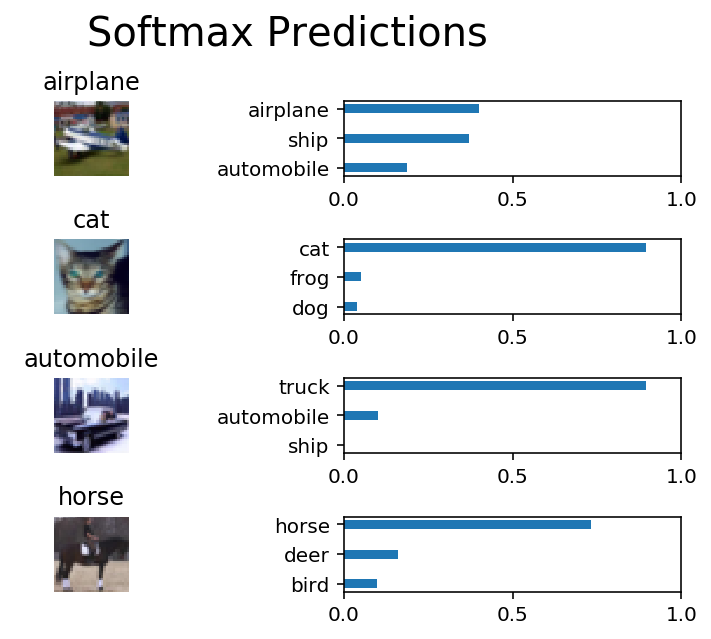

In [59]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.